In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.0 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Genomic Correlates of Immune-Cell Infiltrates ...,Large-scale genomic characterization of tumors...,[BIOC],[],[1300],[Large-scale cancer sequencing efforts have ad...,[Whole-exome sequencing of 619 colorectal canc...
1,A detailed clinical study of pain in 1957 part...,Introduction: The causes of pain in early/mode...,"[MEDI, NEUR]","[Central sensitization, Musculoskeletal, Nonmo...","[2717, 2728, 2808]",[Chronic pain affects 60–80% of Parkinson's di...,[Pain is common in early/moderate PD and impai...
2,Quantitative determination of major alkaloids ...,Chinoline alkaloids found in Cinchona bark sti...,"[BIOC, CHEM]","[Chinoline alkaloids, Cinchona bark, Cinchona ...","[1303, 1602, 1605]","[Cinchonae cortex, which originates from sever...",[Six chinoline alkaloids from Cinchona bark we...
3,Eye region surface temperature dynamics during...,Reactions to acute stressors are critical for ...,"[NEUR, PSYC]","[Avian, Bird, Homeostasis, Infrared thermograp...","[2802, 3205]","[Stress challenges an organism's homeostasis, ...",[We used thermal imaging (TI) to infer acute p...
4,"Combination of bone marrow aspirate, cancellou...",Introduction: Nonunion due to a critical-sized...,[MEDI],"[Bone marrow aspirate, Case series, Critical-s...",[2746],[A bone defect of large size is common and may...,[Critical-sized bone defect remains a challeng...


In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
def prepare_elsevier_data(train_df, val_df, test_df):
    """
    Prepares the Elsevier corpus splits for multi-label classification without splitting.

    Args:
    - train_df: DataFrame containing the training dataset with columns 'abstract' and 'subjareas'.
    - val_df: DataFrame containing the validation dataset with columns 'abstract' and 'subjareas'.
    - test_df: DataFrame containing the test dataset with columns 'abstract' and 'subjareas'.

    Returns:
    - train_texts, val_texts, test_texts: Lists containing texts for training, validation, and testing.
    - train_labels, val_labels, test_labels: Arrays containing encoded labels for training, validation, and testing.
    - target_names: List of unique labels (subject areas).
    """
    mlb = MultiLabelBinarizer()

    all_labels = pd.concat([train_df['subjareas'], val_df['subjareas'], test_df['subjareas']])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df['subjareas'])
    val_labels = mlb.transform(val_df['subjareas'])
    test_labels = mlb.transform(test_df['subjareas'])

    train_texts = train_df['abstract'].tolist()
    val_texts = val_df['abstract'].tolist()
    test_texts = test_df['abstract'].tolist()

    return train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, mlb.classes_

train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)

In [ ]:
print(train_labels[:2])
print(train_texts[:2])
print(len(target_names))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]
['Large-scale genomic characterization of tumors from prospective cohort studies may yield new insights into cancer pathogenesis. We performed whole-exome sequencing of 619 incident colorectal cancers (CRCs) and integrated the results with tumor immunity, pathology, and survival data. We identified recurrently mutated genes in CRC, such as BCL9L, RBM10, CTCF, and KLF5, that were not previously appreciated in this disease. Furthermore, we investigated the genomic correlates of immune-cell infiltration and found that higher neoantigen load was positively associated with overall lymphocytic infiltration, tumor-infiltrating lymphocytes (TILs), memory T cells, and CRC-specific survival. The association with TILs was evident even within microsatellite-stable tumors. We also found positive selection of mutations in HLA genes and other components of the antigen-processing machinery in TIL-rich tumors. These results 

In [ ]:
print(len(train_texts))
print(len(val_texts))

32072
4009


In [ ]:
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)


In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

model_checkpoint = 'allenai/longformer-base-4096'

longformer_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

longformer_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

longformer_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFLongformerModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing TFLongformerModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from a PyTorch model that you expect to be exactly identical (

In [ ]:
max_length = 800

In [ ]:
train_encodings = longformer_tokenizer(train_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
valid_encodings = longformer_tokenizer(val_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
test_encodings = longformer_tokenizer(test_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

In [ ]:
def print_encoding_shapes(encodings, encoding_type="Abstract"):
    """
    Prints the shapes of input_ids, token_type_ids, and attention_mask for given encodings.

    Args:
    - encodings: The tokenized encodings from the BERT tokenizer.
    - encoding_type: A string indicating the type of encoding (e.g., "Abstract" or "Body").
    """
    print(f"\n{encoding_type} Texts Encodings Shapes:")
    input_ids_shape = encodings.input_ids.shape
    #token_type_ids_shape = encodings.token_type_ids.shape
    attention_mask_shape = encodings.attention_mask.shape

    print(f"Input IDs shape: {input_ids_shape}")
    #print(f"Token Type IDs shape: {token_type_ids_shape}")
    print(f"Attention Mask shape: {attention_mask_shape}")

print_encoding_shapes(train_encodings, "train_encodings")
print_encoding_shapes(valid_encodings, "valid_encodings")
print_encoding_shapes(test_encodings, "test_encodings")


train_encodings Texts Encodings Shapes:
Input IDs shape: (32072, 800)
Attention Mask shape: (32072, 800)

valid_encodings Texts Encodings Shapes:
Input IDs shape: (4009, 800)
Attention Mask shape: (4009, 800)

test_encodings Texts Encodings Shapes:
Input IDs shape: (4008, 800)
Attention Mask shape: (4008, 800)


In [ ]:
from transformers import TFAutoModel

def build_finetune_longformer(pretrained_model_name_or_path='allenai/longformer-base-4096', num_classes=18, max_length=1024, hidden_size=[1024], dropout=0.1, learning_rate=0.00005, from_pt=True):
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
    llm_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

    llm_out = pretrained_LLM(llm_inputs)
    output_token = llm_out.last_hidden_state

    hidden = tf.math.reduce_mean(output_token, axis=1)

    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[output_classification])
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
longformer_model = build_finetune_longformer(pretrained_model_name_or_path=model_checkpoint,
                                                 num_classes=num_subject_areas,
                                                 max_length=max_length)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFLongformerModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing TFLongformerModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFLongformerModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


In [ ]:
longformer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 800)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 800)]                0         []                            
                                                                                                  
 tf_longformer_model (TFLon  TFLongformerBaseModelOutpu   1486594   ['attention_mask[0][0]',      
 gformerModel)               tWithPooling(last_hidden_s   56         'input_ids[0][0]']           
                             tate=(None, 800, 768),                                           

In [ ]:
model_history = longformer_model.fit(
    [train_encodings.input_ids, train_encodings.attention_mask],
    nptrain_labels,
    validation_data=(
        [valid_encodings.input_ids, valid_encodings.attention_mask],
        npvalid_labels
    ),
    batch_size=8,
    epochs=2
)

Epoch 1/2


4009/4009 [==============================] - 2961s 715ms/step - loss: 0.1818 - accuracy: 0.4807 - val_loss: 0.1634 - val_accuracy: 0.5258
Epoch 2/2
4009/4009 [==============================] - 2818s 703ms/step - loss: 0.1472 - accuracy: 0.5504 - val_loss: 0.1555 - val_accuracy: 0.5301


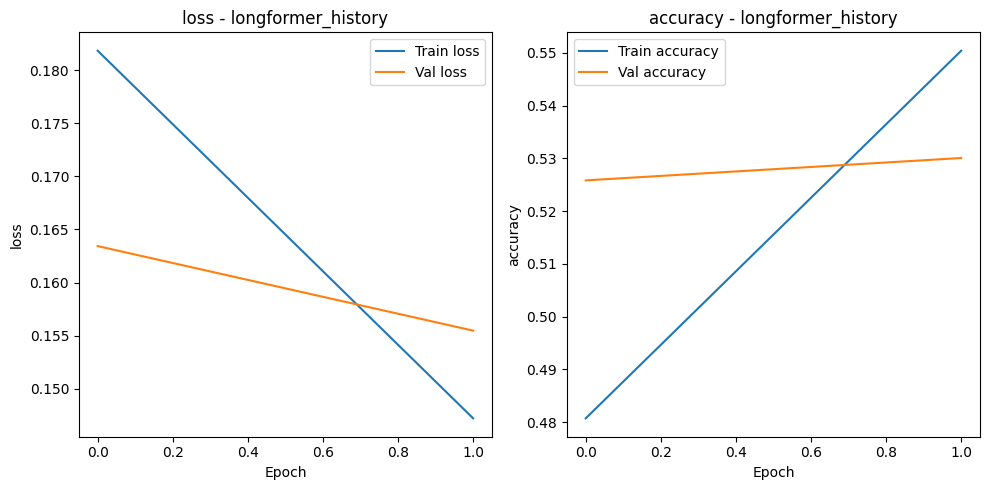

In [ ]:
def plot_model_performance(model_history, model_name='Model'):
    metrics = ['loss', 'accuracy']
    plt.figure(figsize=(10, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.plot(model_history.history[metric], label='Train ' + metric)
        plt.plot(model_history.history['val_' + metric], label='Val ' + metric)
        plt.title('%s - %s' % (metric, model_name))
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_model_performance(model_history, model_name='longformer_history')

In [ ]:
val_score = longformer_model.evaluate([valid_encodings.input_ids,  valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 124s 983ms/step - loss: 0.1555 - accuracy: 0.5301
Val loss: 0.15547341108322144
Val accuracy: 0.5300573706626892


In [ ]:
val_predictions = longformer_model.predict([valid_encodings.input_ids, valid_encodings.attention_mask])

126/126 [==============================] - 148s 979ms/step


126/126 [==============================] - 123s 979ms/step
              precision    recall  f1-score   support

        AGRI       0.73      0.66      0.69       427
        BIOC       0.73      0.53      0.61       670
        CENG       0.42      0.23      0.30       199
        CHEM       0.50      0.33      0.40       245
        COMP       0.57      0.37      0.45       163
        EART       0.82      0.54      0.65       218
        ENER       0.71      0.52      0.60       257
        ENGI       0.67      0.43      0.52       439
        ENVI       0.58      0.66      0.62       549
        IMMU       0.57      0.69      0.63       236
        MATE       0.65      0.46      0.54       310
        MEDI       0.76      0.73      0.75       847
        MULT       0.79      0.66      0.72       461
        NEUR       0.75      0.80      0.77       367
        PHAR       0.51      0.65      0.57       218
        PHYS       0.47      0.66      0.55       219
        PSYC       0.4

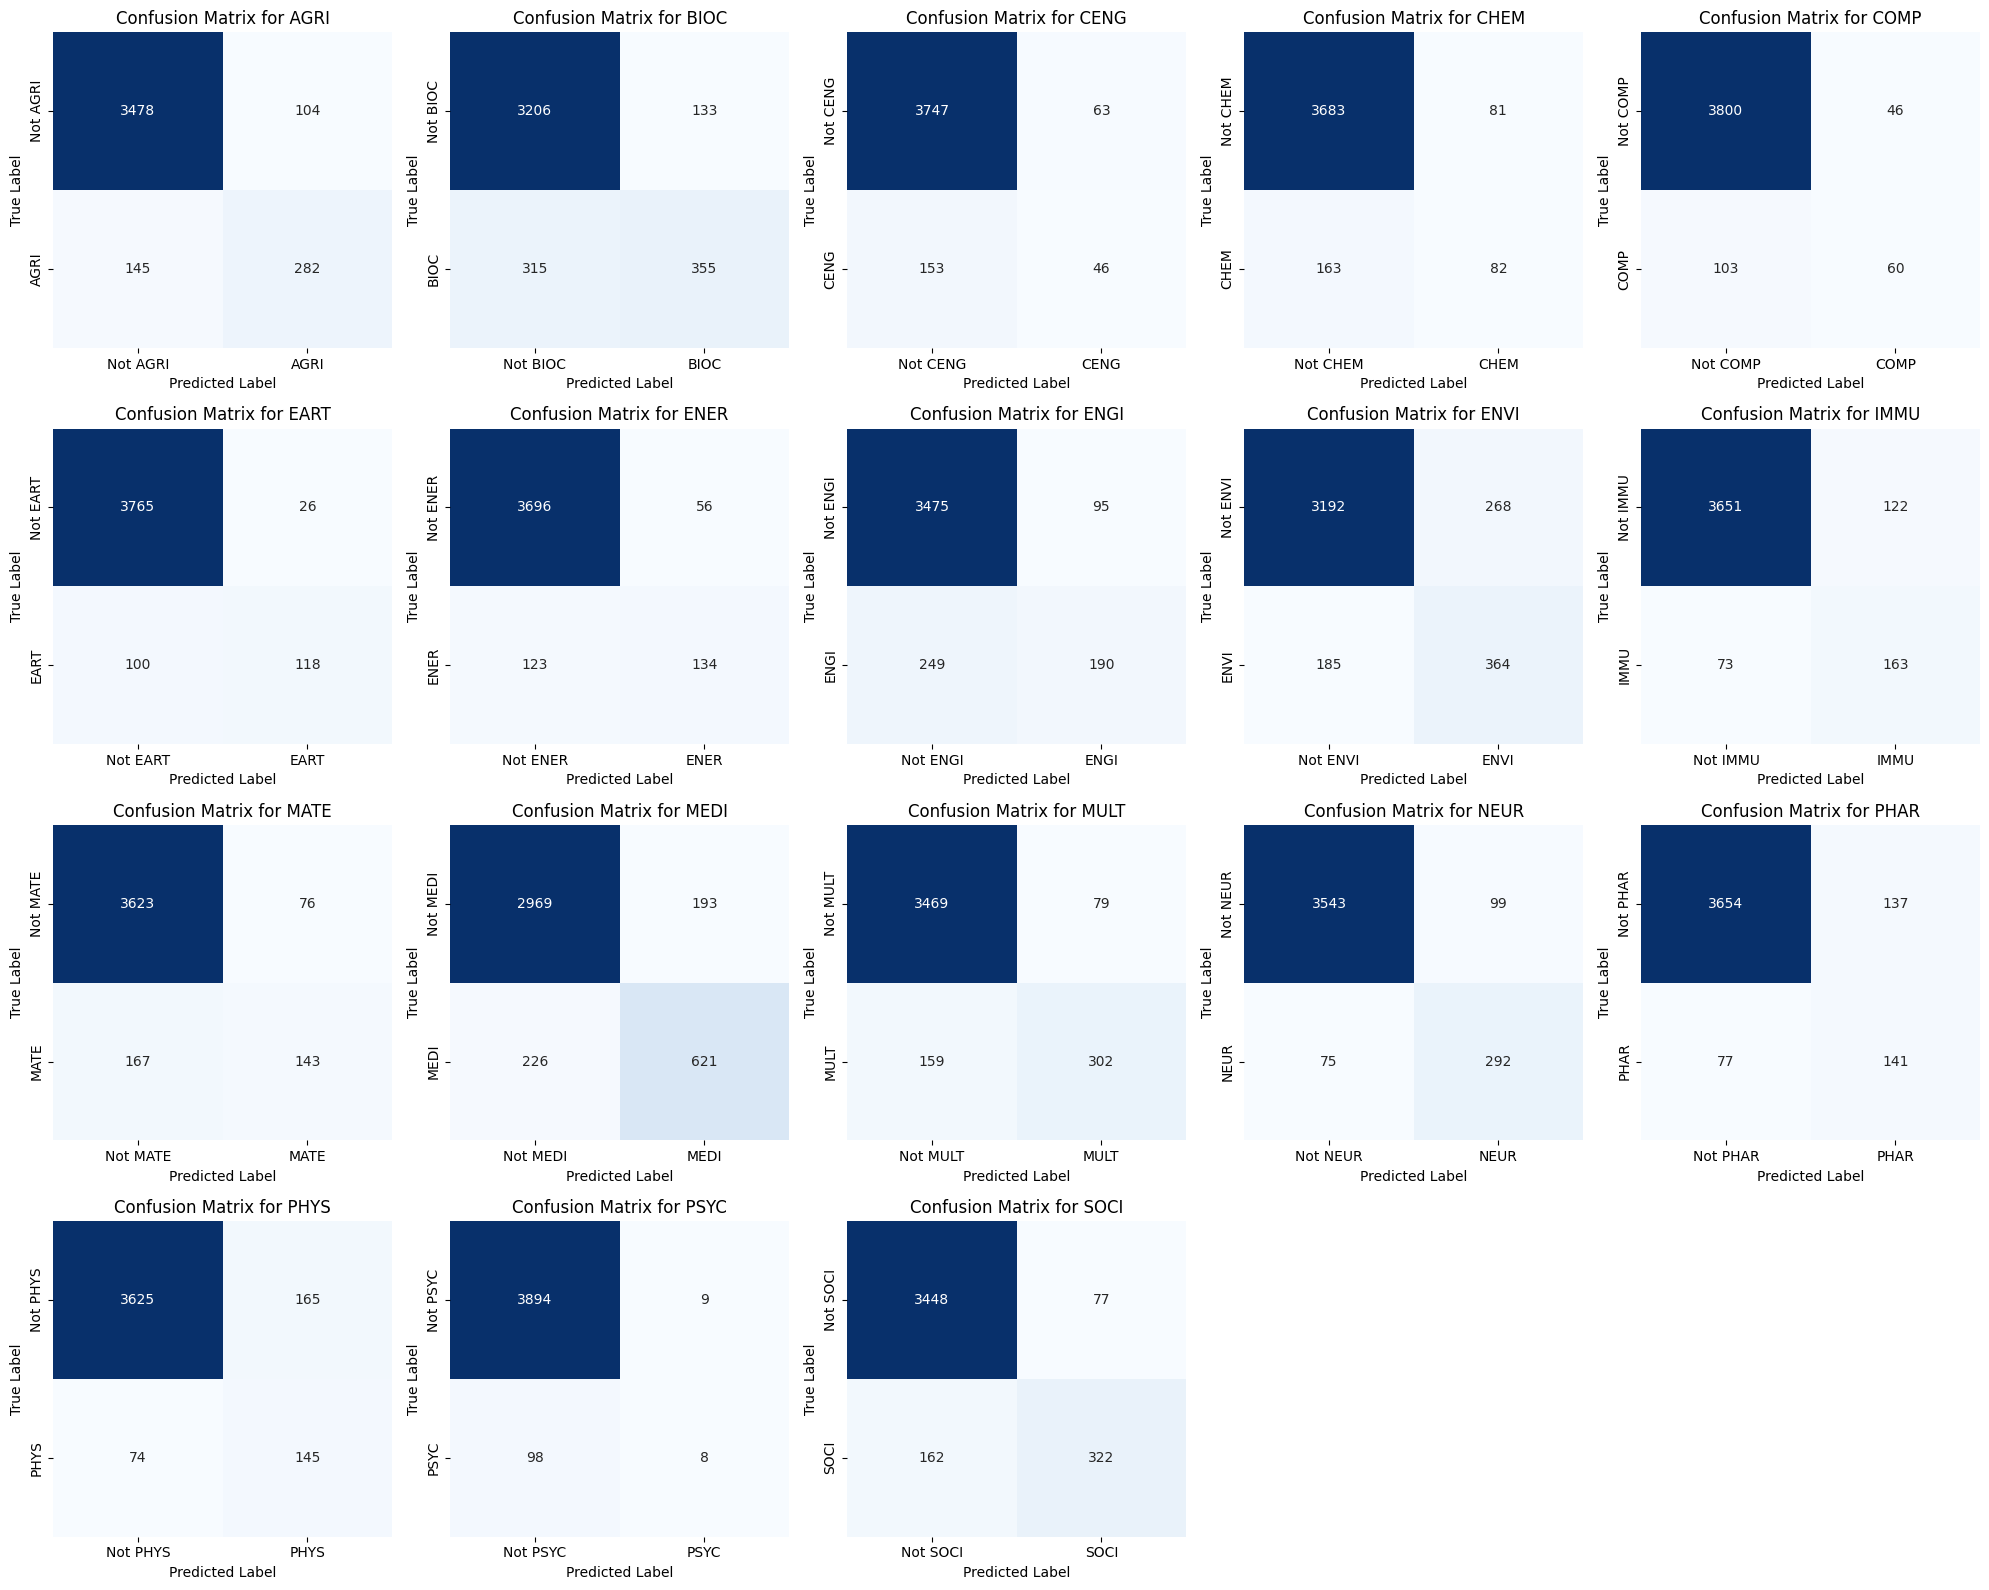

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(longformer_model,
             [valid_encodings.input_ids, valid_encodings.attention_mask],
             val_labels,
             target_names)


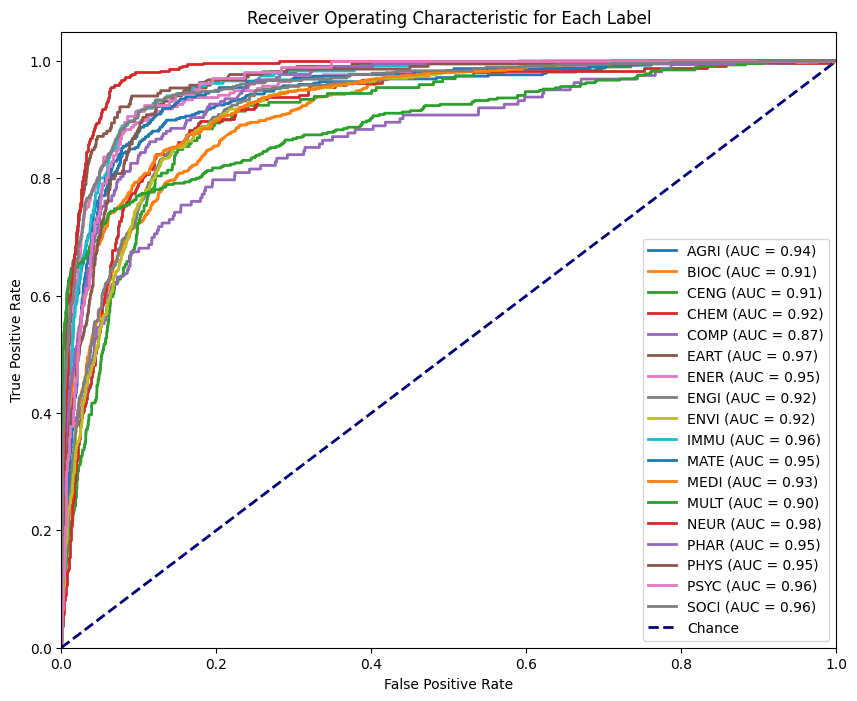

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = longformer_model.evaluate([test_encodings.input_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 124s 983ms/step - loss: 0.1533 - accuracy: 0.5526
Test loss: 0.1533350795507431
Test accuracy: 0.5526447296142578


In [ ]:
test_predictions = longformer_model.predict([test_encodings.input_ids, test_encodings.attention_mask])

126/126 [==============================] - 123s 979ms/step


126/126 [==============================] - 123s 979ms/step
              precision    recall  f1-score   support

        AGRI       0.75      0.66      0.70       422
        BIOC       0.70      0.57      0.63       696
        CENG       0.49      0.27      0.35       190
        CHEM       0.56      0.38      0.45       258
        COMP       0.53      0.30      0.38       162
        EART       0.80      0.58      0.67       223
        ENER       0.73      0.53      0.61       253
        ENGI       0.59      0.38      0.46       409
        ENVI       0.56      0.66      0.60       546
        IMMU       0.58      0.60      0.59       249
        MATE       0.68      0.49      0.57       346
        MEDI       0.77      0.73      0.75       845
        MULT       0.83      0.68      0.75       438
        NEUR       0.75      0.86      0.80       320
        PHAR       0.51      0.62      0.56       236
        PHYS       0.48      0.68      0.56       223
        PSYC       0.6

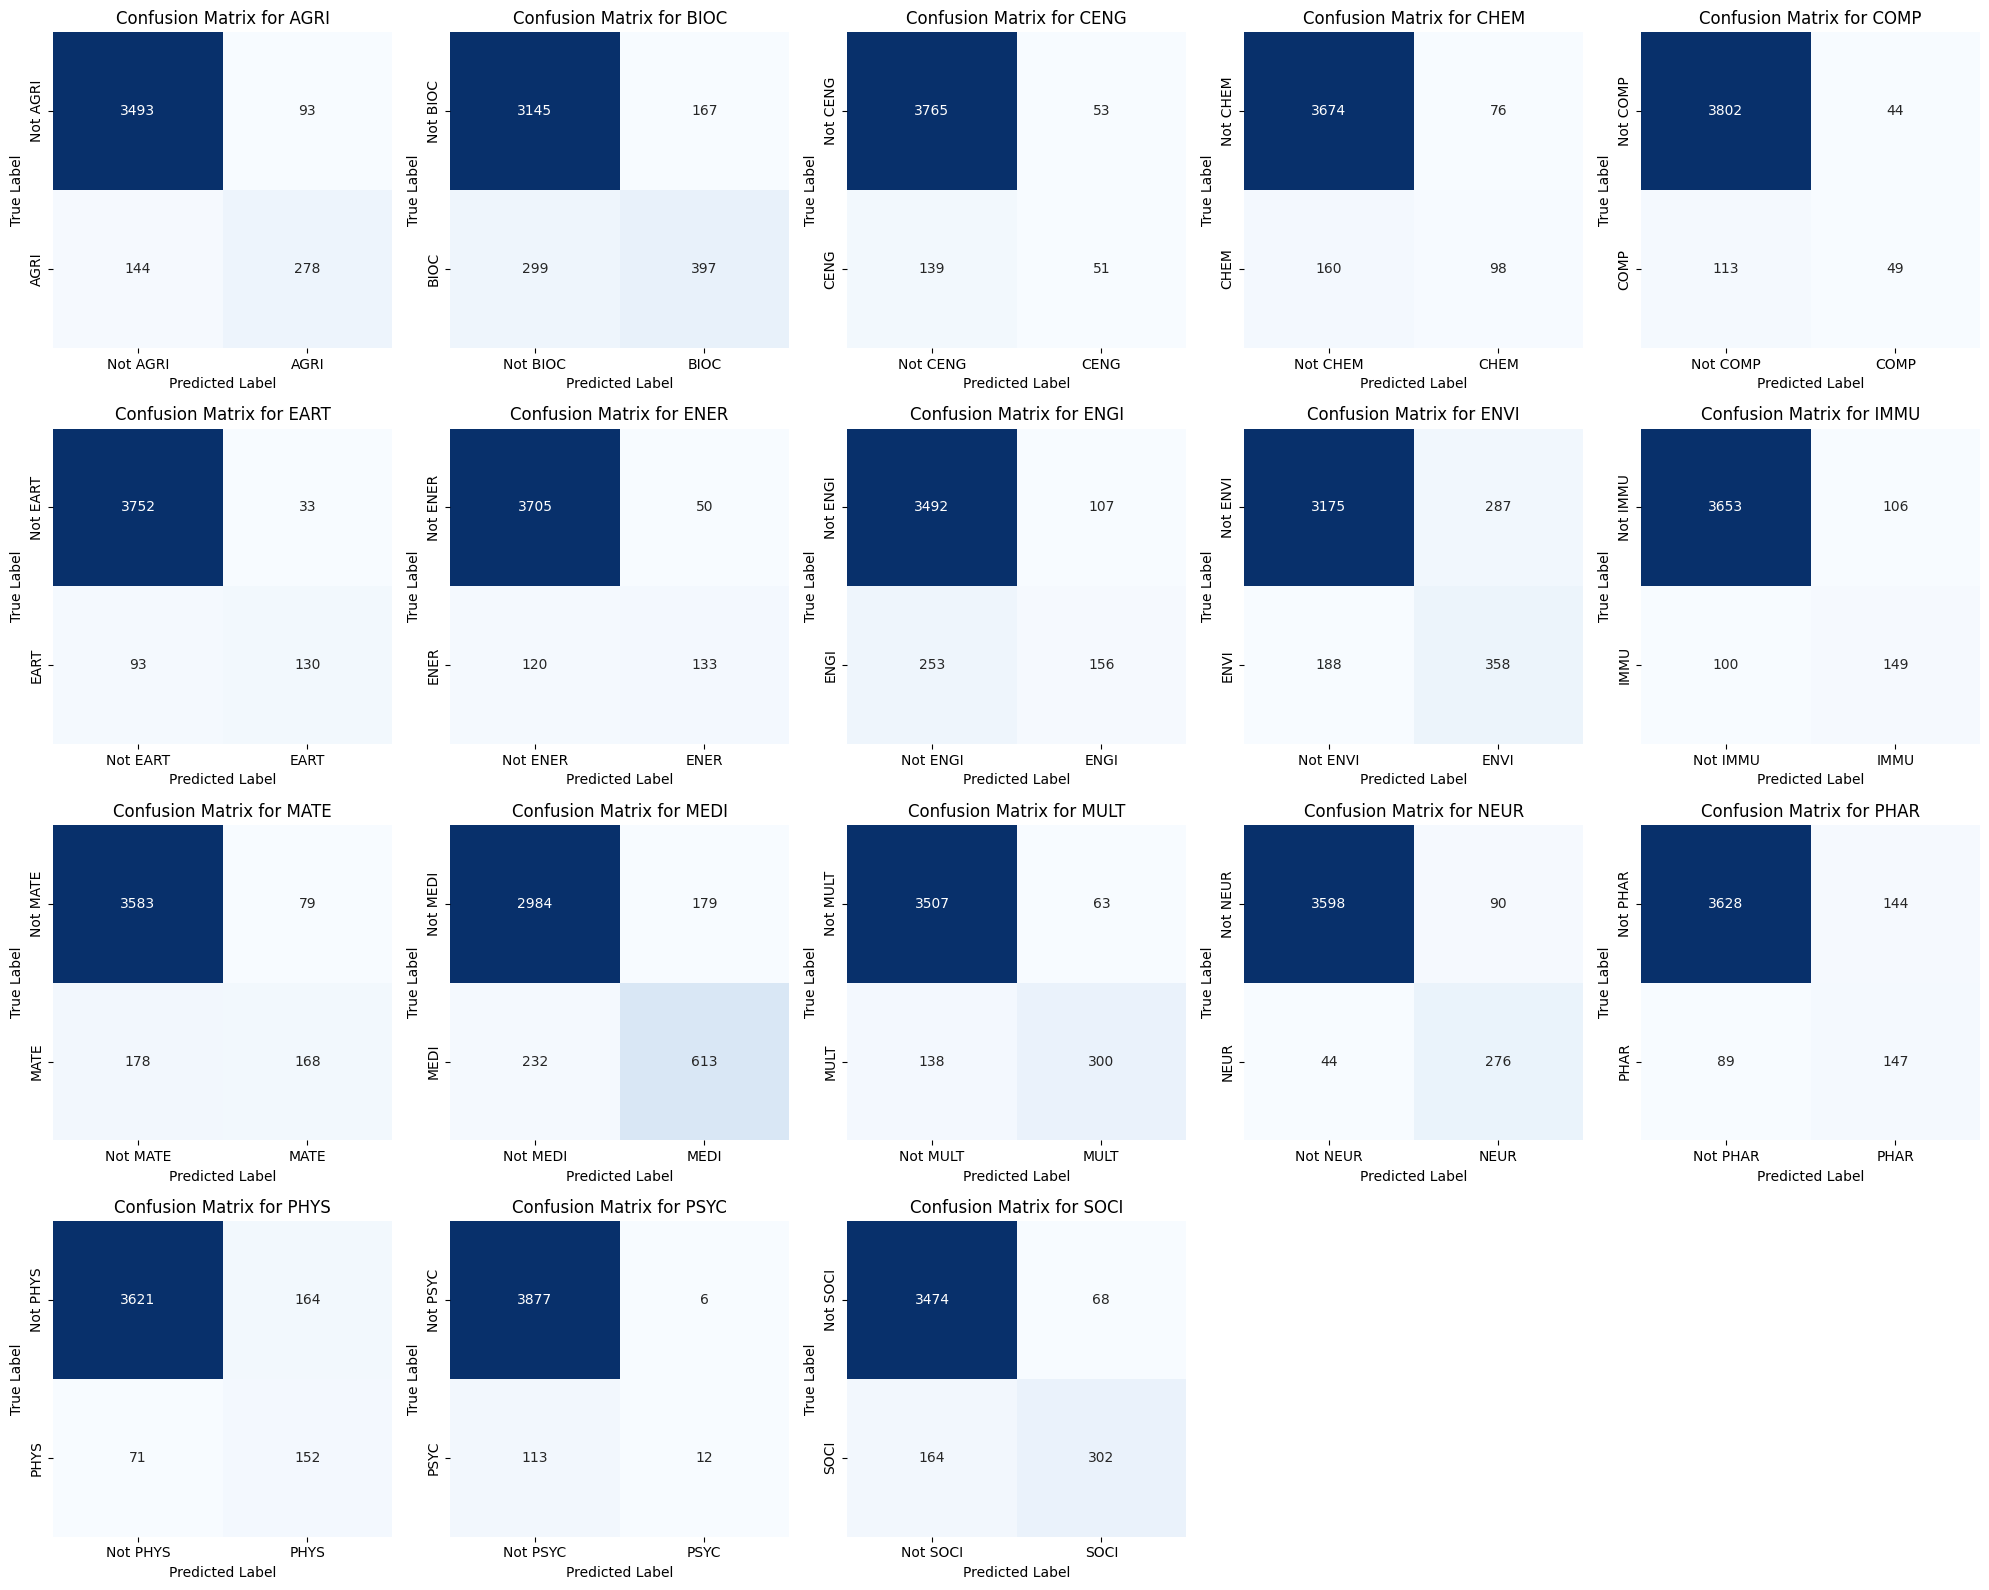

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(longformer_model,
             [test_encodings.input_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0
            max_labels.append("No Label")

    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    result_df.to_csv(result_path + 'longformer_baseline.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,This paper focused on determining the sub leth...,[MULT],ENVI,ENVI,0.775073
1,"Liver samples of two gadoid species, Atlantic ...","[BIOC, ENVI]",ENVI,ENVI,0.944109
2,The manufacture of non-crimp fabric composites...,"[ENGI, MATE]","ENGI, MATE",MATE,0.914099
3,Quantification of interfacial tension (IFT) an...,[MEDI],MEDI,MEDI,0.983651
4,Despite the increasing number of Organic Ranki...,"[ENGI, ENVI]","ENER, ENGI",ENGI,0.810627
...,...,...,...,...,...
4003,Since the introduction of next generation sequ...,[AGRI],BIOC,BIOC,0.572180
4004,Durability of organo-lead halide perovskite ar...,"[CHEM, PHYS]","MATE, PHYS",MATE,0.697221
4005,Antibody-drug conjugates (ADCs) consist of mon...,"[BIOC, CHEM, PHAR]","BIOC, PHAR",PHAR,0.713569
4006,Skin architecture and function depend on diver...,[BIOC],BIOC,BIOC,0.631754
